> # DATA PREPARATION

# Independent Variable - Polarization

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

**Dataset Link: https://www.v-dem.net/data/v-party-dataset/**

In [ ]:
df_all = pd.read_csv("data/political identities/V-Dem-CPD-Party-V2.csv")

In [ ]:
# Example: Get all data for India in 2019
df_all[(df_all.country_name == "India") & (df_all.year == 2019)]

,v2paenname,v2paorname,v2pashname,v2paid,pf_party_id,party_gaps,pf_url,country_name,histname,country_id,...,ep_people_vs_elite,ep_v7_lib_cons_saliency,ep_type_populism,ep_type_populist_values,ep_v8_popul_rhetoric,ep_v9_popul_saliency,e_regiongeo,e_regionpol,e_regionpol_6C,GPS_ID
2500,Indian People's Party,NaN,BJP,422,422.0,NaN,https://partyfacts.herokuapp.com/data/partycod...,India,Republic of India [independent state],39,...,NaN,NaN,NaN,NaN,NaN,NaN,14,8,6,NaN
2537,Indian National Congress,NaN,INC,1297,1297.0,NaN,https://partyfacts.herokuapp.com/data/partycod...,India,Republic of India [independent state],39,...,NaN,NaN,NaN,NaN,NaN,NaN,14,8,6,NaN


In [4]:
# Columns to be used for analysis
column_names = [
    "v2paenname", "v2pashname", "country_name", "country_id", "year", "e_regionpol_6C", "v2paseatshare",
    "v2paanteli", "v2papeople", "v2paopresp", "v2paplur", "v2paminor", 
    "v2paviol", "v2paimmig", "v2palgbt", "v2paculsup", "v2parelig", 
    "v2pagender", "v2pawomlab", "v2pariglef", "v2pawelf", "v2paclient",
    ]

feature_mapping = {
    "v2paanteli": "Anti-Elitism",
    "v2papeople": "People-Centrism",
    "v2paopresp": "Political Opponents",
    "v2paplur": "Political Pluralism",
    "v2paminor": "Minority Rights",
    "v2paviol": "Rejection of Political Violence",
    "v2paimmig": "Immigration",
    "v2palgbt": "LGBT Social Equality",
    "v2paculsup": "Cultural Superiority",
    "v2parelig": "Religious Principles",
    "v2pagender": "Gender Equality",
    "v2pawomlab": "Working Women",
    "v2pariglef": "Economic Left-Right Scale",
    "v2pawelf": "Welfare",
    "v2paclient": "Clientelism"
}


trial_df = df_all[column_names]

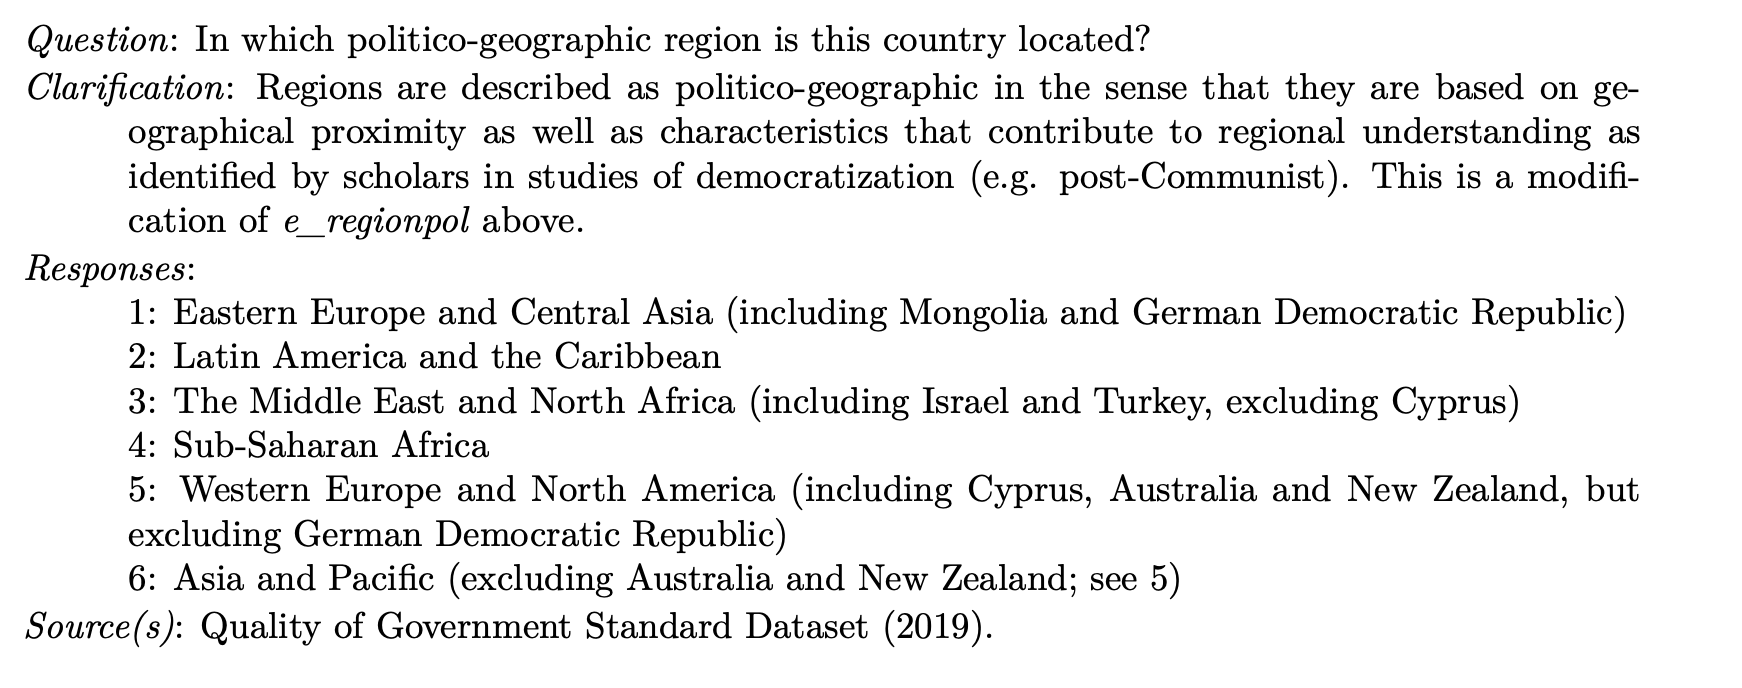

In [ ]:
# Mapping the e_regionpol_6C column to the actual region names
region_map = {
    1: "Eastern Europe and Central Asia",
    2: "Latin America and the Caribbean",
    3: "Middle East and North Africa",
    4: "Sub-Saharan Africa",
    5: "Western Europe and North America",
    6: "Asia and Pacific",
}

trial_df["Region"] = trial_df["e_regionpol_6C"].map(region_map)

In [ ]:
# X variables for analysis
foi = [ "v2paanteli", "v2papeople", "v2paopresp", "v2paplur", "v2paminor", 
    "v2paviol", "v2paimmig", "v2palgbt", "v2paculsup", "v2parelig", 
    "v2pagender", "v2pawomlab", "v2pariglef", "v2pawelf", "v2paclient",]

# Drop rows with NaN values in all the X variables
trial_df.dropna(subset=foi, how='all',inplace=True)

In [7]:
# Show values where there is only 1 value for a country and year combination
# trial_df.groupby(['country_name', 'year']).filter(lambda x: len(x) == 1)

In [ ]:
# Scaling the values of the X variables to 0-10
def scale_columns(df, columns):
    scaled_df = df.copy()
    for col in columns:
        min_val = scaled_df[col].min()
        max_val = scaled_df[col].max()
        # Scale to 0-10 instead of 1-10
        scaled_df[col] = 10 * (scaled_df[col] - min_val) / (max_val - min_val)
    return scaled_df

scaled_df = scale_columns(trial_df, foi)
scaled_df['v2paseatshare_scaled'] = scaled_df.groupby(['country_name', 'year'])['v2paseatshare'].transform(lambda x: x / x.sum())

In [9]:
scaled_df.describe()

,country_id,year,e_regionpol_6C,v2paseatshare,v2paanteli,v2papeople,v2paopresp,v2paplur,v2paminor,v2paviol,v2paimmig,v2palgbt,v2paculsup,v2parelig,v2pagender,v2pawomlab,v2pariglef,v2pawelf,v2paclient,v2paseatshare_scaled
count,6316.000000,6316.000000,6316.000000,6165.000000,6305.000000,6316.000000,6302.000000,6304.000000,6307.000000,6307.000000,6305.000000,6307.000000,6307.000000,6307.000000,6270.000000,6307.000000,6303.000000,6289.000000,6298.000000,6165.000000
mean,97.698385,1998.509816,3.537207,25.091046,3.656126,4.928648,5.710319,7.159336,5.779748,7.249403,5.309481,4.639270,5.457318,6.635674,4.347755,6.084640,5.074827,5.370937,4.231149,0.276561
std,60.260091,13.526224,1.760581,24.667458,1.933547,1.885982,1.977862,2.081519,2.174685,1.989587,1.511175,1.798175,1.943007,2.114468,1.650751,1.550782,1.721405,1.695455,2.165528,0.263504
min,3.000000,1965.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1989.000000,2.000000,7.100000,2.135936,3.536619,4.201830,5.956298,4.123237,5.917878,4.575135,3.407651,4.203248,5.195078,3.406860,5.017479,3.923783,4.226325,2.423615,0.080612
50%,89.000000,2000.000000,4.000000,15.300000,3.360175,4.915811,5.938941,7.691330,5.892091,7.660505,5.095135,4.481885,5.465804,6.833733,4.011635,6.173884,5.159962,5.483547,4.092414,0.174571
75%,156.000000,2010.000000,5.000000,36.000000,4.921523,6.327173,7.159424,8.977690,7.702330,9.060251,6.281081,5.634659,6.906564,8.586435,5.315719,7.147609,6.410256,6.539814,5.938064,0.400000
max,236.000000,2019.000000,6.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [10]:
def calculate_polarization(group, feature_col, seatshare_col='v2paseatshare'):
    # Remove any rows where either feature or seatshare is NA
    valid_data = group[[feature_col, seatshare_col]].dropna()
    
    if len(valid_data) < 2:  # Need at least 2 parties for polarization
        return None
    
    # 1. Calculate system-wide average (weighted by vote share)
    total_votes = valid_data[seatshare_col].sum()
    if total_votes == 0:
        return 0
        
    vote_proportions = valid_data[seatshare_col] / total_votes
    system_average = (valid_data[feature_col] * vote_proportions).sum()
    
    # 2. Calculate polarization using the paper's formula
    # ([party score - system average]/5)² × vote_share
    # Then sum and take square root
    polarization = np.sqrt(
        (vote_proportions * 
         ((valid_data[feature_col] - system_average)/5)**2
        ).sum()
    )
    
    return polarization

def calculate_all_polarization(df, features):
    results = []
    
    for (country, year), group in df.groupby(['country_name', 'year']):
        row = {'country_name': country, 'year': year}
        
        # Include the e_regionpol_6C column
        if 'Region' in group.columns:
            row['Region'] = group['Region'].iloc[0]  # Take the first value in the group
        
        # Calculate polarization for each feature
        for feature in features:
            pol = calculate_polarization(group, feature, 'v2paseatshare_scaled')
            mapped_name = feature_mapping.get(feature, feature)
            row[f'{mapped_name} Polarization'] = pol
            
        results.append(row)
    
    return pd.DataFrame(results)


In [102]:
def calculate_polarization(group, feature_col, seatshare_col='v2paseatshare', scale_max=None):
    # Remove any rows where either feature or seatshare is NA
    valid_data = group[[feature_col, seatshare_col]].dropna()
    
    if len(valid_data) < 2:  # Need at least 2 parties for polarization
        return None
        
    # Determine the scale maximum if not provided
    if scale_max is None:
        scale_max = valid_data[feature_col].max()
    
    # Calculate the appropriate denominator (half of the scale range)
    denominator = (scale_max / 2)
    
    # 1. Calculate system-wide average (weighted by vote share)
    total_votes = valid_data[seatshare_col].sum()
    if total_votes == 0:
        return 0
        
    vote_proportions = valid_data[seatshare_col] / total_votes
    system_average = (valid_data[feature_col] * vote_proportions).sum()
    
    # 2. Calculate polarization using modified formula with appropriate denominator
    polarization = np.sqrt(
        (vote_proportions * 
         ((valid_data[feature_col] - system_average)/denominator)**2
        ).sum()
    )
    
    return polarization

def calculate_all_polarization(df, features):
    # Dictionary mapping features to their scale maximums
    scale_maxes = {
        'feature1': 4,  # for 0-4 scale
        'feature2': 5,  # for 0-5 scale
        'feature3': 10  # for 0-10 scale
    }
    
    results = []
    
    for (country, year), group in df.groupby(['country_name', 'year']):
        row = {'country_name': country, 'year': year}
        
        if 'Region' in group.columns:
            row['Region'] = group['Region'].iloc[0]
        
        # Calculate polarization for each feature with its appropriate scale
        for feature in features:
            scale_max = scale_maxes.get(feature)  # Get the appropriate scale maximum
            pol = calculate_polarization(group, feature, 'v2paseatshare_scaled', scale_max)
            mapped_name = feature_mapping.get(feature, feature)
            row[f'{mapped_name} Polarization'] = pol
            
        results.append(row)
    
    return pd.DataFrame(results)

In [ ]:
polar_df = calculate_all_polarization(scaled_df, foi)

In [100]:
# Drop rows where any polarization values are NaN
foi_polarization = [f'{f} Polarization' for f in list(feature_mapping.values())] # List of polarization columns
polar_df.dropna(subset=foi_polarization, how='any',inplace=True)

In [13]:
polar_df.describe()

,year,Anti-Elitism Polarization,People-Centrism Polarization,Political Opponents Polarization,Political Pluralism Polarization,Minority Rights Polarization,Rejection of Political Violence Polarization,Immigration Polarization,LGBT Social Equality Polarization,Cultural Superiority Polarization,Religious Principles Polarization,Gender Equality Polarization,Working Women Polarization,Economic Left-Right Scale Polarization,Welfare Polarization,Clientelism Polarization
count,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000
mean,1998.100709,0.398294,0.274399,0.219089,0.173567,0.240027,0.164643,0.206724,0.258809,0.257021,0.226895,0.214075,0.199959,0.317981,0.223421,0.278410
std,13.483205,0.200124,0.166355,0.176367,0.164742,0.185221,0.157069,0.162955,0.178159,0.192922,0.169302,0.144235,0.154891,0.162138,0.164136,0.186819
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1989.000000,0.253306,0.138566,0.071073,0.042665,0.087168,0.011498,0.078376,0.110388,0.104199,0.096863,0.113464,0.070018,0.186250,0.095536,0.115816
50%,1999.000000,0.414372,0.267577,0.195849,0.136552,0.213028,0.133058,0.181657,0.257311,0.217508,0.208751,0.210565,0.184057,0.342514,0.207946,0.280545
75%,2009.000000,0.531937,0.399962,0.318370,0.250328,0.360052,0.259449,0.307316,0.395931,0.384002,0.325609,0.307865,0.299640,0.434996,0.329398,0.422056
max,2019.000000,0.965469,0.795800,0.901840,0.903653,0.844027,0.903653,0.757452,0.810362,0.851112,0.946057,0.870996,0.942809,0.872951,0.918847,0.787040


In [14]:
polar_df.describe()

,year,Anti-Elitism Polarization,People-Centrism Polarization,Political Opponents Polarization,Political Pluralism Polarization,Minority Rights Polarization,Rejection of Political Violence Polarization,Immigration Polarization,LGBT Social Equality Polarization,Cultural Superiority Polarization,Religious Principles Polarization,Gender Equality Polarization,Working Women Polarization,Economic Left-Right Scale Polarization,Welfare Polarization,Clientelism Polarization
count,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000
mean,1998.100709,0.398294,0.274399,0.219089,0.173567,0.240027,0.164643,0.206724,0.258809,0.257021,0.226895,0.214075,0.199959,0.317981,0.223421,0.278410
std,13.483205,0.200124,0.166355,0.176367,0.164742,0.185221,0.157069,0.162955,0.178159,0.192922,0.169302,0.144235,0.154891,0.162138,0.164136,0.186819
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1989.000000,0.253306,0.138566,0.071073,0.042665,0.087168,0.011498,0.078376,0.110388,0.104199,0.096863,0.113464,0.070018,0.186250,0.095536,0.115816
50%,1999.000000,0.414372,0.267577,0.195849,0.136552,0.213028,0.133058,0.181657,0.257311,0.217508,0.208751,0.210565,0.184057,0.342514,0.207946,0.280545
75%,2009.000000,0.531937,0.399962,0.318370,0.250328,0.360052,0.259449,0.307316,0.395931,0.384002,0.325609,0.307865,0.299640,0.434996,0.329398,0.422056
max,2019.000000,0.965469,0.795800,0.901840,0.903653,0.844027,0.903653,0.757452,0.810362,0.851112,0.946057,0.870996,0.942809,0.872951,0.918847,0.787040


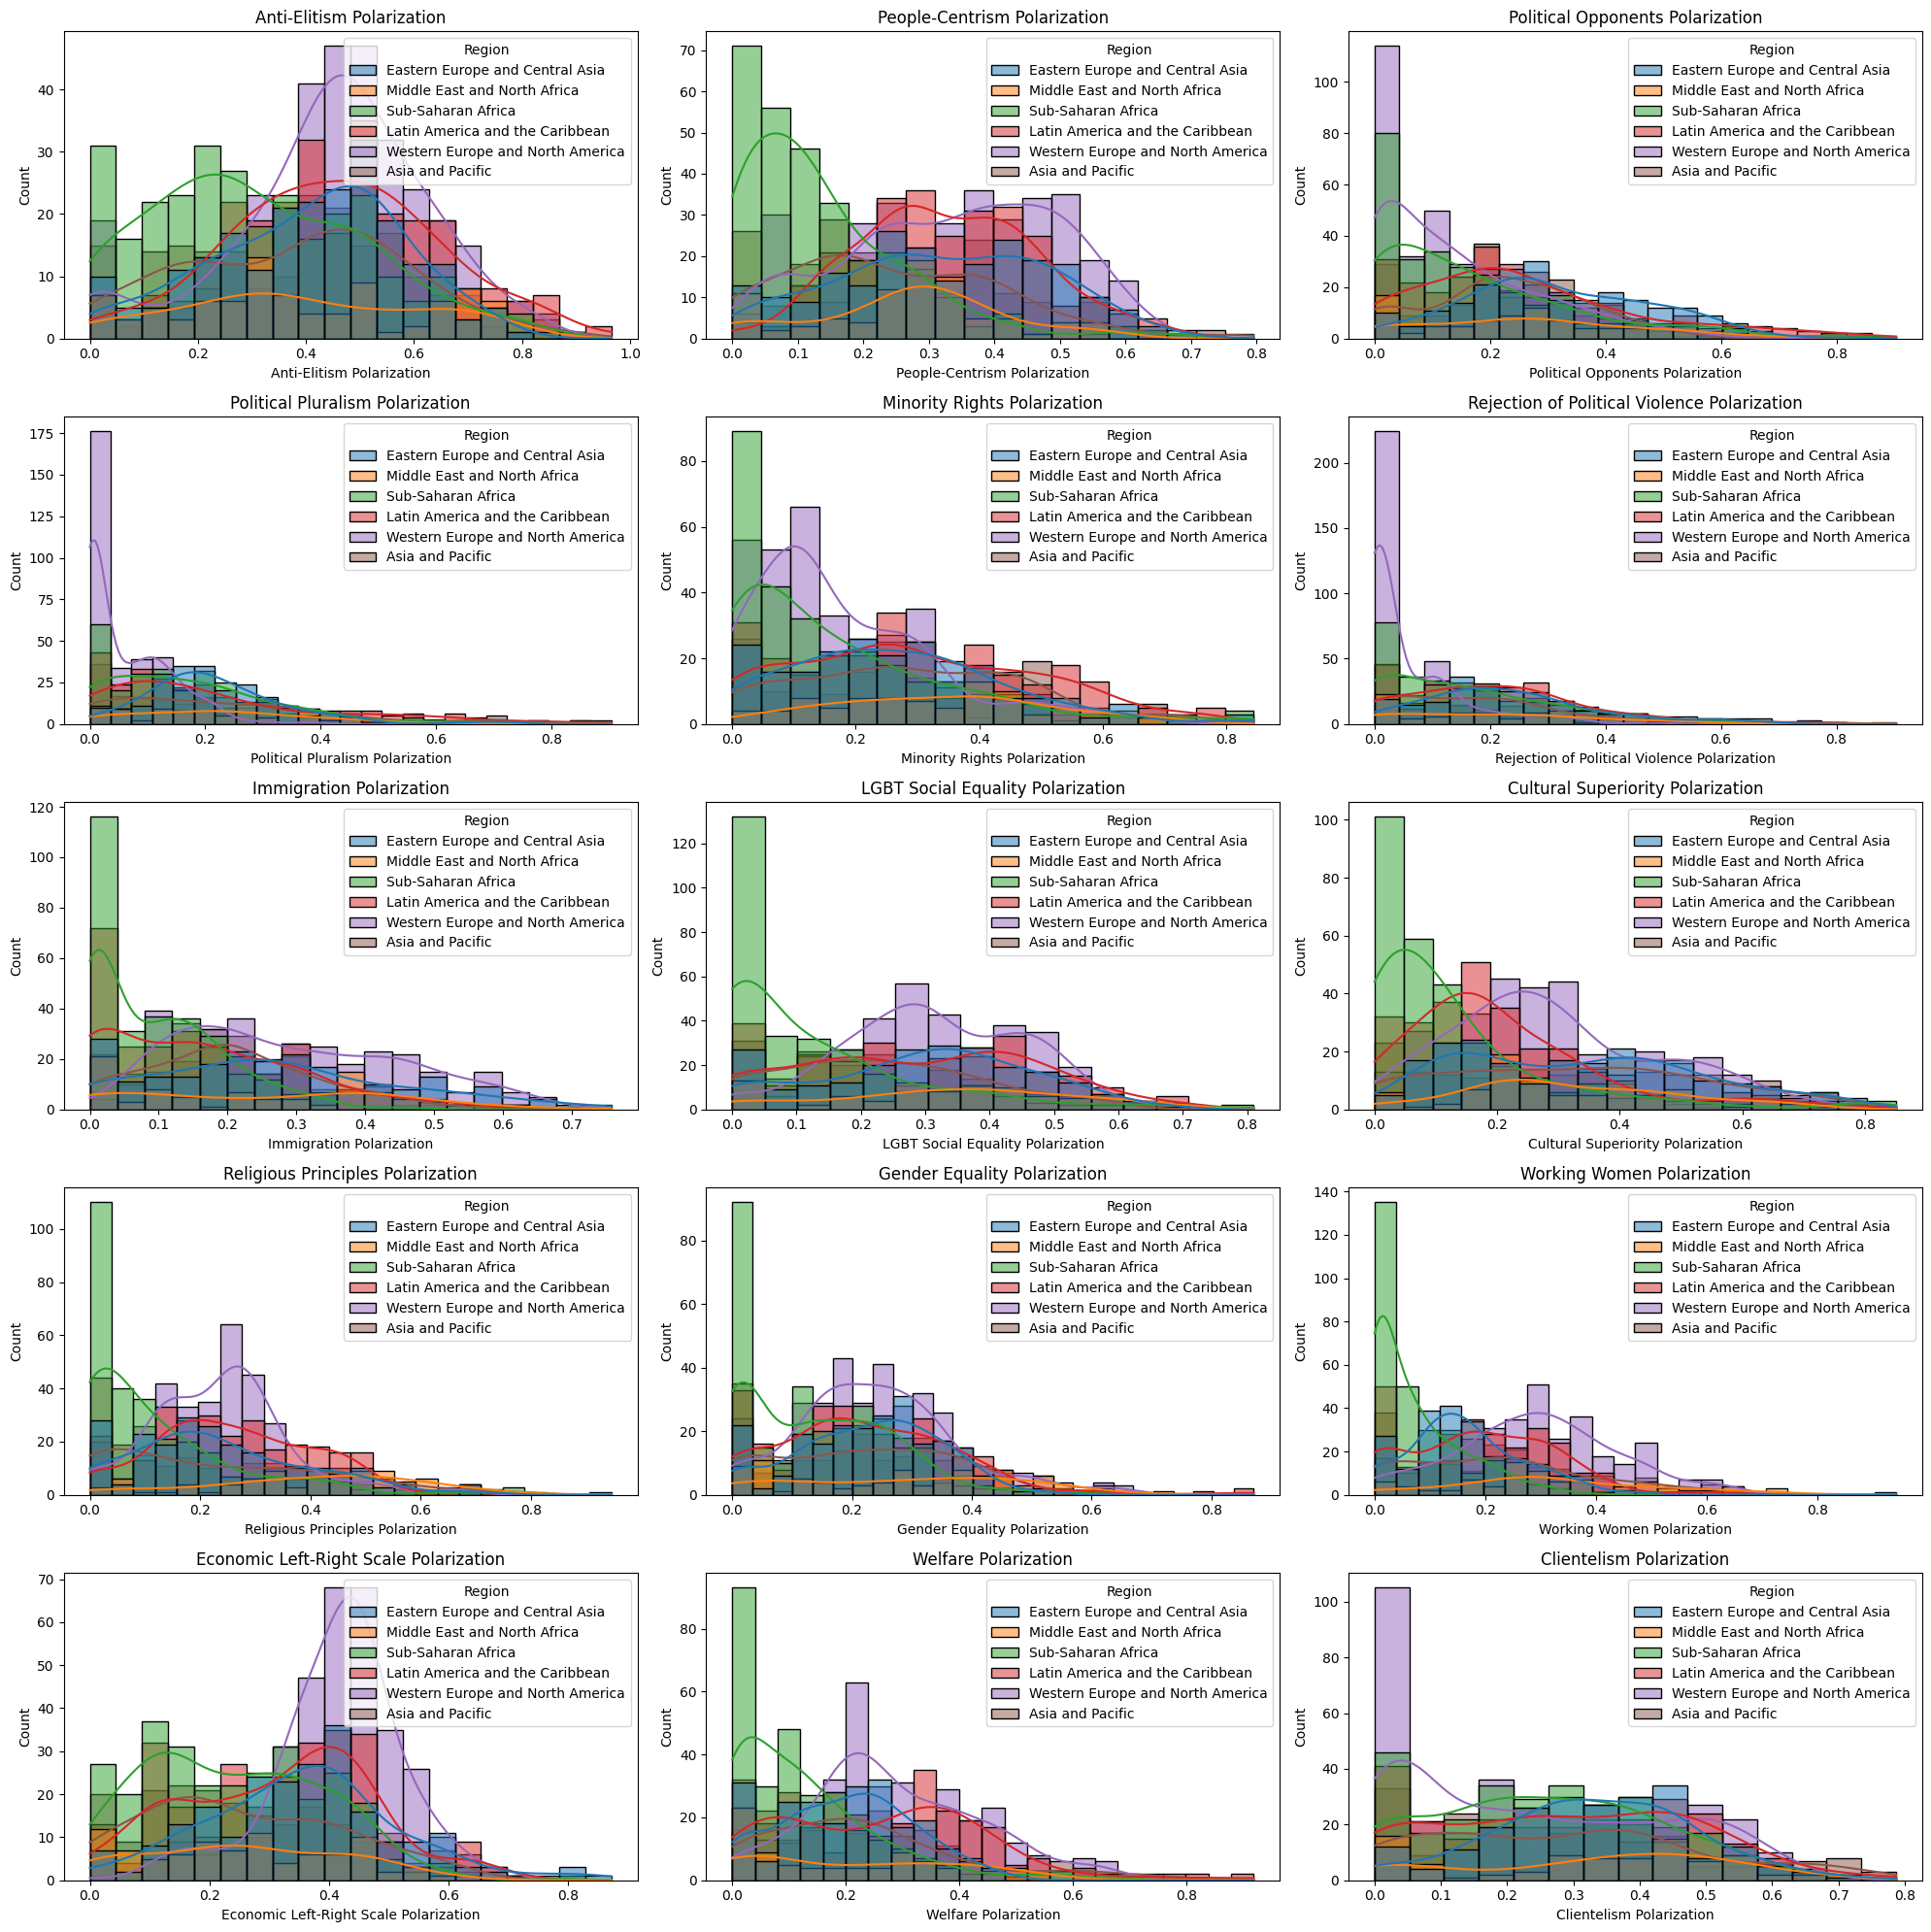

In [ ]:
# Plot the distribution of polarization values for each feature in a grid subplot (region column as hue or bar color)
plt.figure(figsize=(20, 20))
for i, feature in enumerate(list(feature_mapping.values())):
    plt.subplot(5, 3, i+1)
    sns.histplot(data=polar_df, x=f'{feature} Polarization', hue='Region', kde=True)
    plt.tight_layout()
    plt.title(f'{feature} Polarization')

In [ ]:
min_max_year = polar_df.groupby('Region')['year'].agg(['min', 'max','count'])
min_max_year.sort_values('count', ascending=True).head(20)

,min,max,count
Region,,,
Middle East and North Africa,1971,2019,90
Asia and Pacific,1970,2019,197
Eastern Europe and Central Asia,1972,2019,223
Latin America and the Caribbean,1970,2019,273
Sub-Saharan Africa,1970,2019,289
Western Europe and North America,1970,2019,338


In [17]:
polar_df.country_name.nunique()

161

In [ ]:
polar_df.groupby('Region')['country_name'].nunique()

Region
Asia and Pacific                    21
Eastern Europe and Central Asia     30
Latin America and the Caribbean     23
Middle East and North Africa        15
Sub-Saharan Africa                  48
Western Europe and North America    24
Name: country_name, dtype: int64

In [19]:
polar_df.groupby('Region')['year'].agg(['min', 'max','count'])

,min,max,count
Region,,,
Asia and Pacific,1970,2019,197
Eastern Europe and Central Asia,1972,2019,223
Latin America and the Caribbean,1970,2019,273
Middle East and North Africa,1971,2019,90
Sub-Saharan Africa,1970,2019,289
Western Europe and North America,1970,2019,338


### Adding TERM End Year, Population and Conflict (Y/N) from **V-Dem**

**Dataset Link:** https://www.v-dem.net/data/the-v-dem-dataset/country-year-v-dem-fullothers-v14/

```
df_hog = pd.read_csv('data/hog/V-Dem-CY-FullOthers-v14_csv_YyKfizl (1)/V-Dem-CY-Full+Others-v14.csv')

# data subset for 'year' 1970 onwards
df_hog = df_hog[df_hog['year'] >= 1970]

df_hog[['country_name','year','v2exnamhog','v2exnamhos', 'v2exhoshog','e_mipopula', 'e_wb_pop','v2x_freexp_altinf','v2clrelig', 'e_miinterc']].to_csv('data/hog/HOG_Name_Year.csv', index=False)
 
```

In [ ]:
df_hog = pd.read_csv('data/hog/HOG_Name_Year.csv')
df_hog.e_miinterc.fillna(0, inplace=True)

# If v2exhoshog is 1 then v2exnamhog should be v2exnamhos for that row
df_hog['v2exnamhog'] = np.where(df_hog['v2exhoshog'] == 1, df_hog['v2exnamhos'], df_hog['v2exnamhog'])

# Rename country_name Türkiye to Turkey and Czechia to Czech Republic in df_hog
df_hog['country_name'] = df_hog['country_name'].str.replace('Türkiye', 'Turkey')
df_hog['country_name'] = df_hog['country_name'].str.replace('Czechia', 'Czech Republic')

In [ ]:
# For a country and year, create new colaumn, end_year and if its not max yaer, then end_year is the next occurance of the country's year
polar_df['end_year'] = polar_df.groupby(['country_name'])['year'].shift(-1)

na_rows = polar_df[polar_df['end_year'].isna()]

for idx, row in na_rows.iterrows():
    country = row['country_name']
    start_year = row['year']
    
    country_hog = df_hog[df_hog['country_name'] == country]
    
    consecutive_rows = country_hog.loc[country_hog['year'] >= start_year].sort_values(by='year')
    initial_value = consecutive_rows.iloc[0]['v2exnamhog'] if not consecutive_rows.empty else None
    
    if initial_value is not None:
        for year, value in zip(consecutive_rows['year'], consecutive_rows['v2exnamhog']):
            if value != initial_value:
                polar_df.at[idx, 'end_year'] = year - 1
                break
        else:
            polar_df.at[idx, 'end_year'] = consecutive_rows['year'].iloc[-1]

In [22]:
polar_df['end_year'] = polar_df['end_year'].astype('int64')

In [ ]:

def calculate_metrics(row):
    # Filter df_hog for rows matching the country and year range
    relevant_rows = df_hog[
        (df_hog['country_name'] == row['country_name']) &
        (df_hog['year'] >= row['year']) &
        (df_hog['year'] <= row['end_year'])
    ]
    
    # Calculate average population (convert from thousands to millions)
    avg_population = relevant_rows['e_wb_pop'].mean()
    avg_freedom = relevant_rows['v2x_freexp_altinf'].mean()
    avg_religion = relevant_rows['v2clrelig'].mean()

    # Check if any conflict occurred
    conflict = 1 if (relevant_rows['e_miinterc'] == 1).any() else 0
    
    return pd.Series({
        'Average Term Population': avg_population,
        'Freedom of Expression': avg_freedom,
        'Religious Freedom': avg_religion,
        'Conflict': conflict
    })

# Apply the function to polar_df
polar_df[['Average Term Population', 'Freedom of Expression', 'Religious Freedom', 'Conflict']] = polar_df.apply(calculate_metrics, axis=1)

In [26]:
# place it next to the current year column in the dataframe
polar_df = polar_df[['country_name', 'year', 'end_year', 'Region', 'Average Term Population', 'Freedom of Expression', 'Religious Freedom',
                     'Conflict', 'Anti-Elitism Polarization',
       'People-Centrism Polarization', 'Political Opponents Polarization',
       'Political Pluralism Polarization', 'Minority Rights Polarization',
       'Rejection of Political Violence Polarization',
       'Immigration Polarization', 'LGBT Social Equality Polarization',
       'Cultural Superiority Polarization',
       'Religious Principles Polarization', 'Gender Equality Polarization',
       'Working Women Polarization', 'Economic Left-Right Scale Polarization',
       'Welfare Polarization', 'Clientelism Polarization']]

In [27]:
polar_df.sample(3)

,country_name,year,end_year,Region,Average Term Population,Freedom of Expression,Religious Freedom,Conflict,Anti-Elitism Polarization,People-Centrism Polarization,...,Rejection of Political Violence Polarization,Immigration Polarization,LGBT Social Equality Polarization,Cultural Superiority Polarization,Religious Principles Polarization,Gender Equality Polarization,Working Women Polarization,Economic Left-Right Scale Polarization,Welfare Polarization,Clientelism Polarization
162,Bolivia,1997,2002,Latin America and the Caribbean,8.338769e+06,0.820000,1.181,0.0,0.597283,0.298332,...,0.168493,0.007647,0.174253,0.185748,0.186052,0.229759,0.152651,0.286418,0.254271,0.357895
58,Australia,1975,1977,Western Europe and North America,1.403933e+07,0.953333,2.259,0.0,0.805340,0.203754,...,0.005901,0.087610,0.147255,0.185782,0.088876,0.334064,0.324600,0.369857,0.354986,0.515407
65,Australia,1993,1996,Western Europe and North America,1.797625e+07,0.965000,1.864,0.0,0.519971,0.213036,...,0.005843,0.203355,0.145680,0.171427,0.096782,0.131111,0.292456,0.333694,0.369874,0.425832


In [28]:
polar_df["Average Term Population"].isna().sum()

np.int64(31)

In [29]:
polar_df.dropna(subset=["Average Term Population"], inplace=True)

In [ ]:
polar_df.to_csv("data/political identities/X.csv", index=False)

---

```
# Filter out countries with less than 5 years of data (Need be?)
countries_to_keep = min_max_year[min_max_year['count'] >= 5].index
polar_df_v2 = polar_df[polar_df['country_name'].isin(countries_to_keep)]
```

# Dependent Variable - Conflicts

**Dataset Link:** https://ucdp.uu.se/downloads/index.html#ged_global 
<br> (UCDP Georeferenced Event Dataset (GED) Global version 24.1)

In [ ]:
df_conflicts = pd.read_csv("data/conflicts/GEDEvent_v24_1.csv")

In [32]:
df_conflicts.sample(2)

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
258254,334182,SYR-2013-1-11973-9758,2013,1,Clear,1,299,299,Syria: Government,11973,...,2013-12-01 00:00:00.000,12,0,0,0,12,12,2,652,NaN
32632,379695,AFG-2021-1-735-127,2021,1,Clear,1,333,333,Afghanistan: Government,735,...,2021-01-26 00:00:00.000,1,0,0,0,1,2,1,700,NaN


In [33]:
df_conflicts.columns

Index(['id', 'relid', 'year', 'active_year', 'code_status', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'side_a_dset_id', 'side_a_new_id', 'side_a',
       'side_b_dset_id', 'side_b_new_id', 'side_b', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'source_headline',
       'source_original', 'where_prec', 'where_coordinates',
       'where_description', 'adm_1', 'adm_2', 'latitude', 'longitude',
       'geom_wkt', 'priogrid_gid', 'country', 'country_id', 'region',
       'event_clarity', 'date_prec', 'date_start', 'date_end', 'deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low',
       'gwnoa', 'gwnob'],
      dtype='object')

In [34]:
df_conflicts.groupby('region')['year'].agg(['min', 'max','count'])

,min,max,count
region,,,
Africa,1989,2023,63650
Americas,1989,2023,40844
Asia,1989,2023,95354
Europe,1989,2023,33841
Middle East,1989,2023,116044


In [35]:
df_conflicts.groupby('region').type_of_violence.value_counts()

region       type_of_violence
Africa       1                   31082
             3                   22587
             2                    9981
Americas     2                   25277
             3                    8789
             1                    6778
Asia         1                   78341
             3                   14858
             2                    2155
Europe       1                   32353
             3                    1034
             2                     454
Middle East  1                   97565
             2                   11179
             3                    7300
Name: count, dtype: int64

In [36]:
replacement_country_dict = {
    'Zimbabwe (Rhodesia)': 'Zimbabwe',
    'Russia (Soviet Union)': 'Russia',
    'Myanmar (Burma)': 'Burma/Myanmar',
    'Madagascar': 'Madagascar',
    'DR Congo (Zaire)': 'Democratic Republic of the Congo',
    'Bosnia-Herzegovina': 'Bosnia and Herzegovina',
    'Serbia (Yugoslavia)': 'Serbia',
    'Yemen (North Yemen)': 'Yemen',
    'Cambodia (Kampuchea)': 'Cambodia',
    'Madagascar (Malagasy)' : 'Madagascar',
    'Congo': 'Democratic Republic of the Congo',
    'Gambia' : 'The Gambia'
}

df_conflicts['country'] = df_conflicts['country'].replace(replacement_country_dict)

In [37]:
# Match which country names mathc in polar_df and df_conflicts
polar_df_names = polar_df.country_name.unique() 
conflict_df_names = df_conflicts.country.unique()

common_names = list(set(polar_df_names) & set(conflict_df_names))

# List of not common names and which dataset they belong to
not_common_names = list(set(conflict_df_names) - set(polar_df_names) )

In [38]:
not_common_names

['South Sudan',
 'Kingdom of eSwatini (Swaziland)',
 'Papua New Guinea',
 'Saudi Arabia',
 'Solomon Islands',
 'Somalia',
 'Qatar',
 'China',
 'Afghanistan',
 'United Arab Emirates',
 'Jordan',
 'Eritrea',
 'Laos']

In [39]:
# Only consider countries of df_conflicts in polar_df
df_conflicts = df_conflicts[df_conflicts['country'].isin(polar_df['country_name'].unique())]

In [40]:
df_conflicts.country.nunique()

110

In [41]:
def analyze_conflicts(conflicts_df, elections_df):
    """
    Analyze conflicts between election periods based on year and end_year in elections_df.
    Returns basic metrics for each period.
    """
    # Convert date columns to datetime
    conflicts_df = conflicts_df.copy()
    conflicts_df['date_start'] = pd.to_datetime(conflicts_df['date_start'])
    conflicts_df['date_end'] = pd.to_datetime(conflicts_df['date_end'])
    
    # Get valid date range
    min_year = conflicts_df['year'].min()
    max_year = conflicts_df['year'].max()
    
    results = []
    
    # Process each election period for all countries
    for idx, election_row in elections_df.iterrows():
        country = election_row['country_name']
        start_year = election_row['year']
        end_year = election_row['end_year']
        
        # Skip if end_year is outside conflict data range or NaN
        if pd.isna(end_year) or start_year < min_year or end_year > max_year:
            continue
            
        # Calculate period length (add 1 to handle same-year periods)
        period_length = max(1, end_year - start_year)
        
        # Get conflicts in this period
        period_conflicts = conflicts_df[
            (conflicts_df['country'] == country) &
            (conflicts_df['date_start'] >= f"{start_year}-01-01") &
            (conflicts_df['date_end'] <= f"{end_year}-12-31")
        ]
        
        # Get population with safety check
        population = max(1, election_row['Average Term Population'])  # Avoid division by zero
        
        # Calculate metrics only if we have conflicts
        n_events = len(period_conflicts)
        total_deaths = period_conflicts['best'].sum() if n_events > 0 else 0
        civilian_deaths = period_conflicts['deaths_civilians'].sum() if n_events > 0 else 0
        
        results.append({
            'period_id': f"{country}_{start_year}_{end_year}",
            'country': country,
            'region': election_row['Region'],
            'population': population,
            'conflicts_vdem': election_row['Conflict'],
            'start_year': start_year,
            'end_year': end_year,
            'period_length': period_length,
            'total_events': n_events,
            'total_deaths': total_deaths,
            'civilian_deaths': civilian_deaths,
            # Per capita metrics (per 100,000 population)
            'events_per_capita': (n_events / population) * 100000,
            'deaths_per_capita': (total_deaths / population) * 100000,
            # Rate metrics (per capita values per year)
            'events_rate': ((n_events / population) * 100000) / period_length,
            'deaths_rate': ((total_deaths / population) * 100000) / period_length,
        })
    
    return pd.DataFrame(results)

In [42]:
features_df = analyze_conflicts(df_conflicts, polar_df)

In [43]:
features_df.sample(3)

,period_id,country,region,population,conflicts_vdem,start_year,end_year,period_length,total_events,total_deaths,civilian_deaths,events_per_capita,deaths_per_capita,events_rate,deaths_rate
224,Croatia_2011_2015,Croatia,Eastern Europe and Central Asia,4249172.4,0.0,2011,2015,4,0,0,0,0.0,0.0,0.0,0.0
678,New Zealand_1993_1996,New Zealand,Western Europe and North America,3649400.0,0.0,1993,1996,3,0,0,0,0.0,0.0,0.0,0.0
794,Romania_2000_2004,Romania,Eastern Europe and Central Asia,21866302.2,0.0,2000,2004,4,0,0,0,0.0,0.0,0.0,0.0


In [44]:
features_df[features_df['country'] == 'India']

,period_id,country,region,population,conflicts_vdem,start_year,end_year,period_length,total_events,total_deaths,civilian_deaths,events_per_capita,deaths_per_capita,events_rate,deaths_rate
426,India_1989_1991,India,Asia and Pacific,8.732952e+08,1.0,1989,1991,2,673,10377,1454,0.077064,1.188258,0.038532,0.594129
427,India_1991_1996,India,Asia and Pacific,9.366456e+08,1.0,1991,1996,5,1439,14060,2280,0.153633,1.501101,0.030727,0.300220
428,India_1996_1998,India,Asia and Pacific,1.000916e+09,1.0,1996,1998,2,840,4404,1299,0.083923,0.439997,0.041962,0.219998
429,India_1998_1999,India,Asia and Pacific,1.028771e+09,1.0,1998,1999,1,930,4186,1126,0.090399,0.406893,0.090399,0.406893
430,India_1999_2004,India,Asia and Pacific,1.084016e+09,1.0,1999,2004,5,5632,16595,4954,0.519549,1.530881,0.103910,0.306176
431,India_2004_2009,India,Asia and Pacific,1.174054e+09,0.0,2004,2009,5,5089,11954,3867,0.433455,1.018181,0.086691,0.203636
432,India_2009_2014,India,Asia and Pacific,1.257420e+09,0.0,2009,2014,5,3205,6289,2022,0.254887,0.500151,0.050977,0.100030
433,India_2014_2019,India,Asia and Pacific,1.331335e+09,0.0,2014,2019,5,2373,4650,1098,0.178242,0.349274,0.035648,0.069855
434,India_2019_2023,India,Asia and Pacific,1.389251e+09,0.0,2019,2023,4,1500,2807,567,0.107972,0.202051,0.026993,0.050513


In [45]:
features_df.deaths_rate.describe()

count    1036.000000
mean        0.756847
std         3.727608
min         0.000000
25%         0.000000
50%         0.000000
75%         0.072078
max        63.360772
Name: deaths_rate, dtype: float64

In [ ]:
features_df.to_csv('data/conflicts/Y_conflicts.csv', index=False)

### Indian Subcontinent

In [47]:
# list of Indian Subcontinent countries
indian_subcontinent = ['India', 'Pakistan', 'Bangladesh', 'Sri Lanka', 'Nepal', 'Bhutan', 'Maldives']

indian_subcontinent_conflicts = df_conflicts[df_conflicts['country'].isin(indian_subcontinent)]

# Same for polar_df
dpi_indian_subcontinent = polar_df[polar_df['country_name'].isin(indian_subcontinent)]

In [48]:
features_df_indiansub = analyze_conflicts(indian_subcontinent_conflicts, dpi_indian_subcontinent)

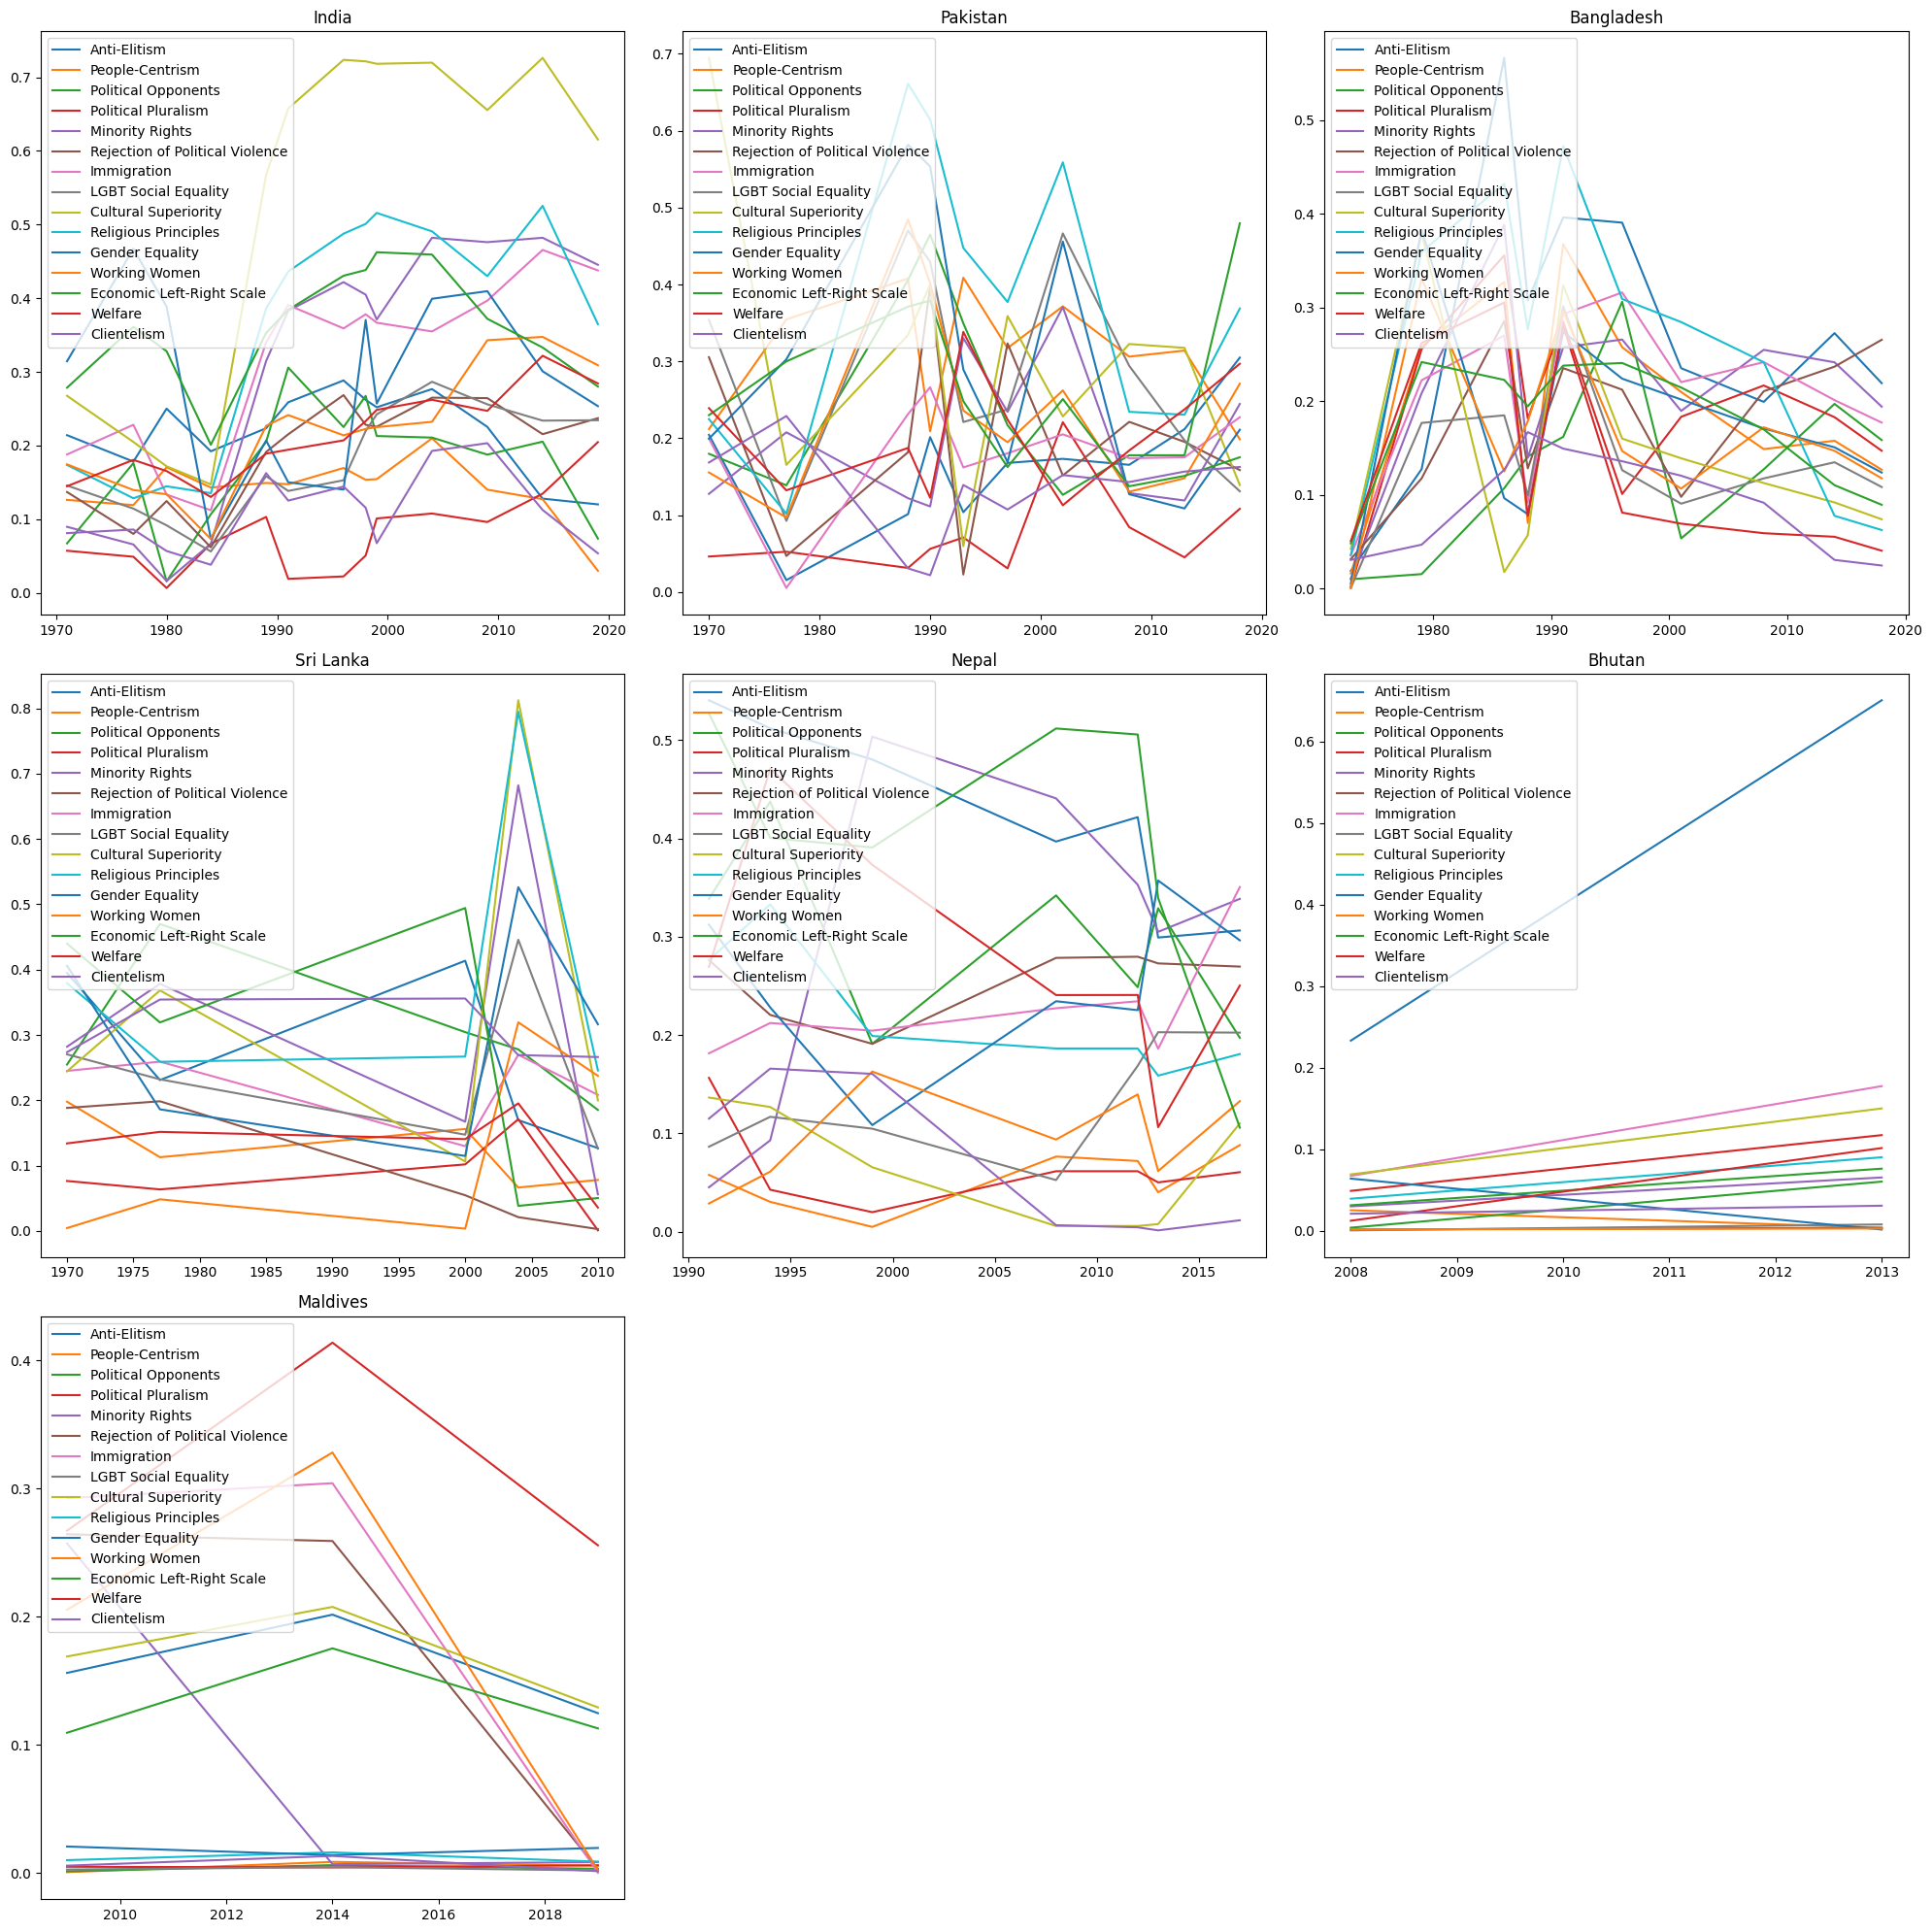

In [ ]:
# For each country in subcontinent (polar_df), plot its polarisation values over time and each line is a polarisation feature.
plt.figure(figsize=(20, 20))
for i, country in enumerate(indian_subcontinent):
    country_data = polar_df[polar_df['country_name'] == country]
    plt.subplot(3, 3, i+1)
    for feature in list(feature_mapping.values()):
        plt.plot(country_data['year'], country_data[f'{feature} Polarization'], label=feature)
    
    plt.title(country)
    plt.legend(loc='upper left')
    plt.tight_layout()

In [50]:
# 0 Death Events / COnflicts
features_df[features_df.total_events==0].region.value_counts(normalize=True)

region
Western Europe and North America    0.269968
Eastern Europe and Central Asia     0.261981
Latin America and the Caribbean     0.174121
Sub-Saharan Africa                  0.167732
Asia and Pacific                    0.105431
Middle East and North Africa        0.020767
Name: proportion, dtype: float64

In [50]:
polar_df.columns

Index(['country_name', 'year', 'end_year', 'Region', 'Average Term Population',
       'Conflict', 'Anti-Elitism Polarization', 'People-Centrism Polarization',
       'Political Opponents Polarization', 'Political Pluralism Polarization',
       'Minority Rights Polarization',
       'Rejection of Political Violence Polarization',
       'Immigration Polarization', 'LGBT Social Equality Polarization',
       'Cultural Superiority Polarization',
       'Religious Principles Polarization', 'Gender Equality Polarization',
       'Working Women Polarization', 'Economic Left-Right Scale Polarization',
       'Welfare Polarization', 'Clientelism Polarization'],
      dtype='object')

In [51]:
polar_df.Region.value_counts()

Region
Western Europe and North America    338
Sub-Saharan Africa                  289
Latin America and the Caribbean     273
Eastern Europe and Central Asia     223
Asia and Pacific                    197
Middle East and North Africa         90
Name: count, dtype: int64

In [52]:
polar_df[polar_df.Region=='Eastern Europe and Central Asia'].country_name.unique()

array(['Albania', 'Armenia', 'Azerbaijan', 'Belarus',
       'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic',
       'Estonia', 'Georgia', 'Hungary', 'Kazakhstan', 'Kosovo',
       'Kyrgyzstan', 'Latvia', 'Lithuania', 'Moldova', 'Mongolia',
       'Montenegro', 'North Macedonia', 'Poland', 'Romania', 'Russia',
       'Serbia', 'Slovakia', 'Slovenia', 'Tajikistan', 'Turkmenistan',
       'Ukraine', 'Uzbekistan'], dtype=object)

---

# Controls

Freedom of Expression and Alternative Sources of Information index (D)
(v2x_freexp_altinf) <br>

GDP per capita (E) (e_gdppc)<br>

In [55]:
import pandas as pd
import requests
import numpy as np

In [ ]:
baseline = pd.read_csv("data/political identities/X.csv")
baseline.sample()

,country_name,year,end_year,Region,Average Term Population,Freedom of Expression,Religious Freedom,Conflict,Anti-Elitism Polarization,People-Centrism Polarization,...,Rejection of Political Violence Polarization,Immigration Polarization,LGBT Social Equality Polarization,Cultural Superiority Polarization,Religious Principles Polarization,Gender Equality Polarization,Working Women Polarization,Economic Left-Right Scale Polarization,Welfare Polarization,Clientelism Polarization
1167,Sri Lanka,2000,2004,Asia and Pacific,19072599.6,0.6688,1.051,0.0,0.413578,0.156015,...,0.054562,0.129645,0.147273,0.106182,0.26688,0.114694,0.00338,0.494321,0.140467,0.355776


### Gini Coeff (Index)

**Dataset Link:** https://data.worldbank.org/indicator/SI.POV.GINI

In [ ]:
gini = pd.read_csv("data/controls/Gini/gini-coefficient.csv")
gini = gini.rename(columns={'Country': 'Entity', 'Year': 'Year', 'Gini coefficient (before tax) (World Inequality Database)': 'gini'})
gini.sample(3)

,Entity,Year,gini
9687,Zimbabwe,1997,NaN
8749,Tonga,1986,NaN
413,Asia (WID),1991,0.674723


In [58]:
gini_replacement_dict = {
    "Myanmar" : "Burma/Myanmar",
    "East Timor" : "Timor-Leste",
    "Cabo Verde" : "Cape Verde",
    "Czechia" : "Czech Republic",
    "Democratic Republic of Congo" : "Democratic Republic of the Congo",
    "Egypt, Arab Rep." : "Egypt",
    "Hong Kong SAR, China" : "Hong Kong",
    "Iran, Islamic Rep." : "Iran",
    "Cote d'Ivoire" : "Ivory Coast",
    "Kyrgyz Republic" : "Kyrgyzstan",
    "Palestine" : "Palestine/West Bank",
    "Congo" : "Republic of the Congo",
    "Russian Federation" : "Russia",
    "Slovak Republic" : "Slovakia",
    "Korea, Rep." : "South Korea",
    "Gambia" : "The Gambia",
    "Turkiye" : "Turkey",
    "United States" : "United States of America",
    "Venezuela, RB" : "Venezuela",
    "Yemen, Rep." : "Yemen",
    "Syrian Arab Republic": "Syria",
}

gini['Entity'] = gini['Entity'].replace(gini_replacement_dict)

In [59]:
# Match which country names mathc in polar_df and gdp_df_names
polar_df_names = baseline.country_name.unique() 
gini_df_names = gini.Entity.unique()

common_names = list(set(polar_df_names) & set(gini_df_names))

# List of not common names and which dataset they belong to
not_common_names = list(set(polar_df_names) - set(gini_df_names))

not_common_names

[]

### Gini World Bank
**Dataset Link:** https://databank.worldbank.org/reports.aspx?source=2&series=SI.POV.GINI

In [ ]:
gini_unclean = pd.read_csv("data/controls/Gini/597fcc8f-c370-48e8-81e7-2e38ccaa597c_Data.csv")

# Filter the data to only include columns relevant to the transformation (year >= 1985)
filtered_gini = gini_unclean.loc[:, ['Country Name'] + [col for col in gini_unclean.columns if col.startswith(('198', '199', '200', '201', '202'))]]

In [61]:
gini_long = filtered_gini.melt(id_vars='Country Name', var_name='year', value_name='gini')

# Drop NA country name
gini_long.dropna(subset=['Country Name'], inplace=True)

#change year valyes from XXXX [YRXXXX] to XXXX
gini_long['year'] = gini_long['year'].str.extract(r'(\d{4})')

In [62]:
gini_wb = gini_long.rename(columns={'Country Name': 'Entity', 'year': 'Year', 'gini': 'gini'})

# Replace .. with NaN in gdp_per_capita
gini_wb['gini'] = gini_wb['gini'].replace('..', np.nan)

# Only keep year >= 1985
gini_wb = gini_wb[gini_wb['Year'] >= '1988']

In [63]:
# Conver the gdp_per_capita column to float64 and year to int64
gini_wb['gini'] = gini_wb['gini'].astype('float64')
gini_wb['Year'] = gini_wb['Year'].astype('int64')

In [64]:
gini.sample(5)

,Entity,Year,gini
4208,Kenya,2004,NaN
3430,Guernsey,2008,NaN
7766,Singapore,2011,0.535535
4580,Liberia,2002,NaN
6835,Palestine/West Bank,2009,0.636057


In [65]:
gini_replacement_dict = {
    "Myanmar" : "Burma/Myanmar",
    "Cabo Verde" : "Cape Verde",
    "Czechia" : "Czech Republic",
    "Congo, Dem. Rep." : "Democratic Republic of the Congo",
    "Egypt, Arab Rep." : "Egypt",
    "Hong Kong SAR, China" : "Hong Kong",
    "Iran, Islamic Rep." : "Iran",
    "Cote d'Ivoire" : "Ivory Coast",
    "Kyrgyz Republic" : "Kyrgyzstan",
    "West Bank and Gaza" : "Palestine/West Bank",
    "Congo, Rep." : "Republic of the Congo",
    "Russian Federation" : "Russia",
    "Slovak Republic" : "Slovakia",
    "Korea, Rep." : "South Korea",
    "Gambia, The" : "The Gambia",
    "Turkiye" : "Turkey",
    "United States" : "United States of America",
    "Venezuela, RB" : "Venezuela",
    "Yemen, Rep." : "Yemen",
    "Syrian Arab Republic": "Syria",
    "Korea, Dem. People's Rep." : "North Korea"
}


gini_wb['Entity'] = gini_wb['Entity'].replace(gini_replacement_dict)

In [66]:
# Match which country names mathc in polar_df and gdp_df_names
polar_df_names = baseline.country_name.unique() 
giniwb_df_names = gini_wb.Entity.unique()

common_names = list(set(polar_df_names) & set(giniwb_df_names))

# List of not common names and which dataset they belong to
not_common_names = list(set(polar_df_names) - set(giniwb_df_names))

In [67]:
not_common_names

[]

In [68]:
gini_wb.dropna(subset=['gini'], inplace=True)
gini.dropna(subset=['gini'], inplace=True)

In [ ]:
# Match which country names mathc in polar_df and gdp_df_names
giniwb_df_names = gini_wb.Entity.unique()
gini_df_names = gini.Entity.unique()

common_names = list(set(giniwb_df_names) & set(gini_df_names))

# List of not common names and which dataset they belong to
not_common_names = list(set(giniwb_df_names)- set(gini_df_names))

In [70]:
not_common_names

['St. Lucia',
 'Tuvalu',
 'Micronesia, Fed. Sts.',
 'Grenada',
 'Tonga',
 'Vanuatu',
 'Marshall Islands',
 'Nauru',
 'Lao PDR',
 'Solomon Islands',
 'Fiji',
 'Venezuela',
 'Viet Nam',
 'Kiribati',
 'Samoa']

In [71]:
# add countries data in gini_2 based on not_common_names countries in gini
data = []

for country in not_common_names:
    country_data = gini_wb[gini_wb['Entity'] == country]
    data.append(country_data)

In [72]:
data = pd.concat(data)
gini = pd.concat([gini, data])

## GDP per capita PPP
**Dataset Link:** https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD

In [ ]:
gdp_unclean = pd.read_csv('data/controls/GDP PPP/6b6890a2-bfe0-4ea3-9b45-5ea8a48c89e9_Data.csv')
gdp_unclean.sample(1)

,Series Name,Series Code,Country Name,Country Code,1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
225,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,East Asia & Pacific (IDA & IBRD countries),TEA,..,..,..,..,..,..,...,11722.9629150176,12106.2473632019,12699.283671099,13456.0278005143,14555.4345487292,15630.4142804571,15940.0644384458,17874.5006423738,19795.624334606,21497.1818108083


In [74]:
# Filter the data to only include columns relevant to the transformation (year >= 1985)
filtered_gdp = gdp_unclean.loc[:, ['Country Name'] + [col for col in gdp_unclean.columns if col.startswith(('198', '199', '200', '201', '202'))]]

In [75]:
gdp_long = filtered_gdp.melt(id_vars='Country Name', var_name='year', value_name='gdp_per_capita')

# Drop NA country name
gdp_long.dropna(subset=['Country Name'], inplace=True)

#change year valyes from XXXX [YRXXXX] to XXXX
gdp_long['year'] = gdp_long['year'].str.extract(r'(\d{4})')

In [76]:
gdp = gdp_long.rename(columns={'Country Name': 'Entity', 'year': 'Year', 'gdp_per_capita': 'gdp_per_capita'})

# Replace .. with NaN in gdp_per_capita
gdp['gdp_per_capita'] = gdp['gdp_per_capita'].replace('..', np.nan)

# Only keep year >= 1985
gdp = gdp[gdp['Year'] >= '1985']

In [77]:
# Conver the gdp_per_capita column to float64 and year to int64
gdp['gdp_per_capita'] = gdp['gdp_per_capita'].astype('float64')
gdp['Year'] = gdp['Year'].astype('int64')

In [78]:
gdp.sample(2)

,Entity,Year,gdp_per_capita
5212,Eswatini,1999,4249.080027
4761,Peru,1997,4844.098199


In [79]:
# 'Myanmar', 'Cabo Verde', 'Czechia', 'Congo, Dem. Rep.', 'Egypt, Arab Rep.', ''Hong Kong SAR, China', 'Iran, Islamic Rep.', 'Cote d'Ivoire',  'Kyrgyz Republic', 'West Bank and Gaza', 'Congo, Rep.', 'Russian Federation', 'Slovak Republic', 'Korea, Rep.', 'Gambia, The', 'Turkiye', 'United States', 'Venezuela, RB',  'Yemen, Rep.'

gdp_replacement_dict = {
    "Myanmar" : "Burma/Myanmar",
    "Cabo Verde" : "Cape Verde",
    "Czechia" : "Czech Republic",
    "Congo, Dem. Rep." : "Democratic Republic of the Congo",
    "Egypt, Arab Rep." : "Egypt",
    "Hong Kong SAR, China" : "Hong Kong",
    "Iran, Islamic Rep." : "Iran",
    "Cote d'Ivoire" : "Ivory Coast",
    "Kyrgyz Republic" : "Kyrgyzstan",
    "West Bank and Gaza" : "Palestine/West Bank",
    "Congo, Rep." : "Republic of the Congo",
    "Russian Federation" : "Russia",
    "Slovak Republic" : "Slovakia",
    "Korea, Rep." : "South Korea",
    "Gambia, The" : "The Gambia",
    "Turkiye" : "Turkey",
    "United States" : "United States of America",
    "Venezuela, RB" : "Venezuela",
    "Yemen, Rep." : "Yemen",
    "Syrian Arab Republic": "Syria",
    "Korea, Dem. People's Rep." : "North Korea"
}

gdp['Entity'] = gdp['Entity'].replace(gdp_replacement_dict)

In [80]:
# Match which country names mathc in polar_df and gdp_df_names
polar_df_names = baseline.country_name.unique() 
gdp_df_names = gdp.Entity.unique()

common_names = list(set(polar_df_names) & set(gdp_df_names))

# List of not common names and which dataset they belong to
not_common_names = list(set(polar_df_names) - set(gdp_df_names))

In [81]:
not_common_names

[]

## Adding Controls (GDP, GINI) to Baseline (X)

In [82]:
def calculate_metrics(row):
    country = row['country_name']
    start_year = row['year']
    end_year = row['end_year']
    mid_year = (start_year + end_year) // 2
    
    # Function to find nearest year's data for a specific metric
    def find_nearest_year_data(df, country, target_year, column):
        country_data = df[df['Entity'] == country]
        if country_data.empty:
            return None
        nearest_year_row = country_data.iloc[(country_data['Year'] - target_year).abs().argsort()[:1]]
        return nearest_year_row[column].values[0] if not nearest_year_row.empty else None
    
    # Filter data within the specified period
    relevant_gdp = gdp[(gdp['Entity'] == country) & (gdp['Year'] >= start_year) & (gdp['Year'] <= end_year)]
    relevant_gini = gini[(gini['Entity'] == country) & (gini['Year'] >= start_year) & (gini['Year'] <= end_year)]
    
    # Calculate GDP per Capita
    gd_avg = relevant_gdp['gdp_per_capita'].mean() if not relevant_gdp.empty else find_nearest_year_data(gdp, country, mid_year, 'gdp_per_capita')
    
    # Calculate Gini Index
    gini_avg = relevant_gini['gini'].mean() if not relevant_gini.empty else find_nearest_year_data(gini, country, mid_year, 'gini')
    
    return pd.Series({
        'GDP per Capita': gd_avg,
        'Gini Index': gini_avg
    })

# Apply the function to the baseline DataFrame
baseline = baseline[baseline['year'] >= 1988]
baseline[['GDP per Capita', 'Gini Index']] = baseline.apply(calculate_metrics, axis=1)

In [83]:
baseline[['GDP per Capita','Gini Index']].isna().sum()

GDP per Capita    4
Gini Index        6
dtype: int64

In [84]:
# Countries with GIni Index as NA
baseline[baseline['Gini Index'].isna()].value_counts('country_name')    

country_name
Barbados    6
Name: count, dtype: int64

In [85]:
# DROP NA GDP and GINI
baseline.dropna(subset=['GDP per Capita', 'Gini Index'], inplace=True)

In [86]:
# Keep Countries with at least 3 occurances in dataset of baseline
baseline.groupby('country_name').filter(lambda x: len(x) >= 3).groupby('Region').agg({'country_name': 'nunique'})

,country_name
Region,
Asia and Pacific,19
Eastern Europe and Central Asia,28
Latin America and the Caribbean,22
Middle East and North Africa,11
Sub-Saharan Africa,42
Western Europe and North America,24


In [87]:
baseline[['GDP per Capita','Gini Index']].isna().sum()

GDP per Capita    0
Gini Index        0
dtype: int64

In [88]:
baseline.country_name.nunique()

154

In [89]:
baseline.groupby('country_name').filter(lambda x: len(x) >= 3).country_name.nunique()

146

In [90]:
baseline.sample(3)

,country_name,year,end_year,Region,Average Term Population,Freedom of Expression,Religious Freedom,Conflict,Anti-Elitism Polarization,People-Centrism Polarization,...,LGBT Social Equality Polarization,Cultural Superiority Polarization,Religious Principles Polarization,Gender Equality Polarization,Working Women Polarization,Economic Left-Right Scale Polarization,Welfare Polarization,Clientelism Polarization,GDP per Capita,Gini Index
826,Moldova,2009,2010,Eastern Europe and Central Asia,2862916.5,0.7190,0.7750,0.0,0.402408,0.193591,...,0.184672,0.198721,0.230189,0.125710,0.007390,0.443595,0.346662,0.217897,6075.120884,0.511637
589,Iran,2000,2004,Middle East and North Africa,67286307.0,0.3552,-2.0090,0.0,0.001682,0.294280,...,0.434640,0.475124,0.717916,0.312444,0.638196,0.099402,0.296696,0.378038,12171.854952,0.627365
929,Nigeria,2015,2019,Sub-Saharan Africa,190961846.6,0.8910,1.3438,0.0,0.596630,0.228631,...,0.315649,0.074108,0.023372,0.398080,0.061226,0.415266,0.112378,0.233262,5130.852521,0.545149


In [ ]:
baseline.to_csv('data/political identities/X.csv', index=False)

---